# Implementation of the Cyberemotions agent-based modeling framework

## Documentation of model test runs #2

After extending the model to simulate the communication of multiple agents, the model failed to illustrate the emergence of collective emotions, despite appearing to model the behavior of one individual agent correctly. The following plots are the result of multiple model runs using different settings, to illustrate where the problem may lie.

The model parameters remained the same for all runs, but the number of agents and the number of time steps a model goes through change.

### Initial model runs

The model in its original form showed the following reaction of an agent to an emotional stimulus.

#### Single agent behavior

The following plots show how the agent responds to two stimuli, one strong enough for the agent arousal to pass its threshold and trigger a response, in the form of a charged field at given time steps. Valence, arousal, and field behave as expected by decreasing towards their respective baselines when they are not stimulated.

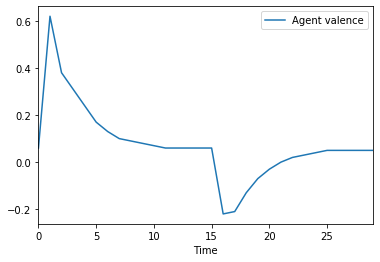

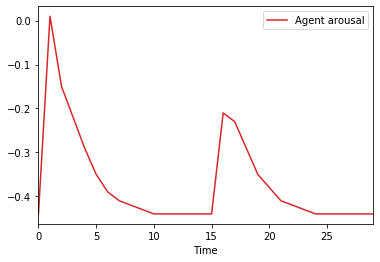

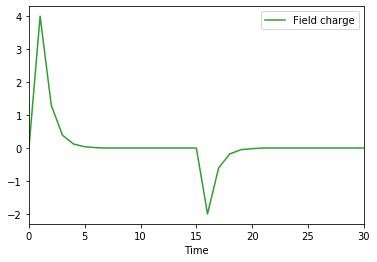

In [6]:
cyberemotions.start_simulation(30,True,False,[45,5],[15,35])

### Extending the model to potentially include multiple agents

#### Single agent behavior

After extending the model with the option to include multiple agents, a single agent still responds in the same manner as above when stimulated.

In [1]:
import model as cyberemotions

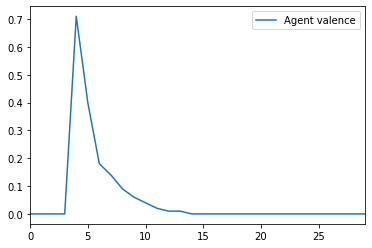

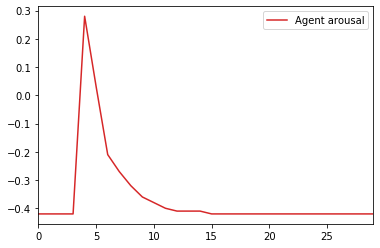

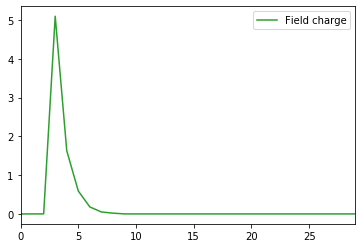

In [5]:
cyberemotions.analyze_data(cyberemotions.start_simulation(30, # How many time steps does the model run for?
                                                          1, # How many agents are simulated?
                                                          True, # Can the agent(s) express their emotions?
                                                          False, # Do stochastic factors influence the agent(s)?
                                                          [5, 55, 4], # Provide artificial stimuli by changing the field:
                                                          None)) # Timestep of occurence, positive expressions, negative expressions

#### Behavior of 100 agents

However, running the same model with 100 agents instead of 1, using the same stimulus, it shows that the agent expressions keep increasing the field, which in turn raises the valence arousal of the agents, resulting in one collective emotion that never fades again.

Furthermore, the fact that the initial drop in arousal after an expression is not plotted shows that inadequate data points are covered in the data collection process. So far, each state variable is plotted once at every given time step, always after the agent perceives the field.

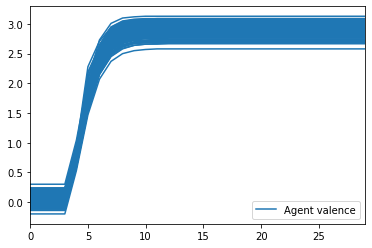

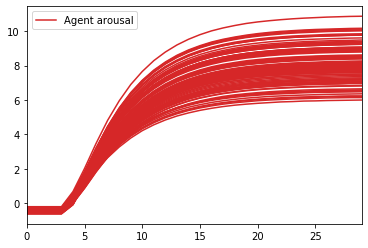

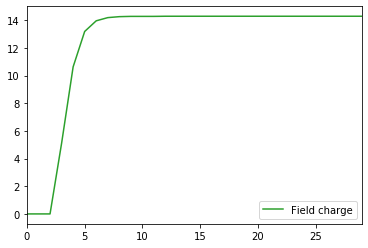

In [2]:
import model as cyberemotions
cyberemotions.analyze_data(cyberemotions.start_simulation(30, # How many time steps does the model run for?
                                                          100, # How many agents are simulated?
                                                          True, # Can the agent(s) express their emotions?
                                                          False, # Do stochastic factors influence the agent(s)?
                                                          [5, 55, 4], # Provide artificial stimuli by changing the field:
                                                          None)) # Timestep of occurence, positive expressions, negative expressions

For future model runs, agent data is collected not only once at every time step, but twice: 1. after the agent perceives the field, and 2. after the agent expressed its emotions and relaxes.

This shows that agent valence and arousal do, in fact, decrease sharply after an emotional expression. Nonetheless, since the field charge remains high, due to many agents expressing their emotions consecutively, it immediately increases the agents state variables again.

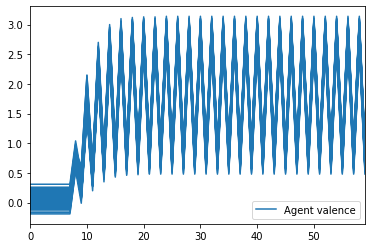

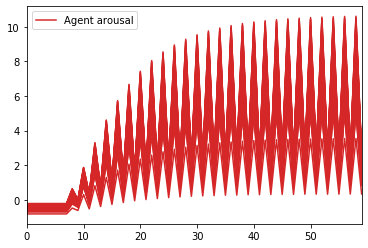

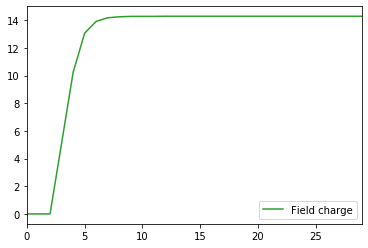

In [2]:
import model as cyberemotions
cyberemotions.analyze_data(cyberemotions.start_simulation(30, # How many time steps does the model run for?
                                                          100, # How many agents are simulated?
                                                          True, # Can the agent(s) express their emotions?
                                                          False, # Do stochastic factors influence the agent(s)?
                                                          [5, 55, 4], # Provide artificial stimuli by changing the field:
                                                          None)) # Timestep of occurence, positive expressions, negative expressions

The same patterns occur when initial emotional expressions are triggered by stochastic shocks, rather than a hard-coded stimulus.

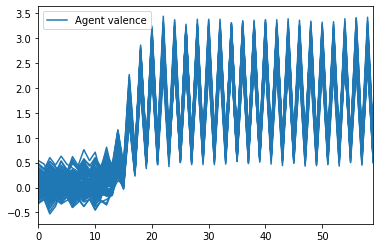

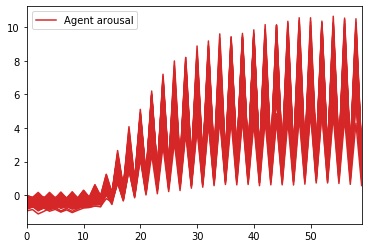

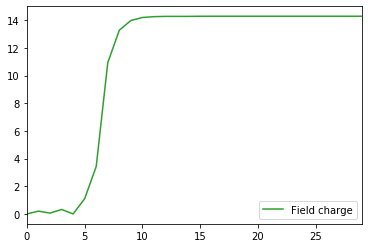

In [3]:
cyberemotions.analyze_data(cyberemotions.start_simulation(30, # How many time steps does the model run for?
                                                          100, # How many agents are simulated?
                                                          True, # Can the agent(s) express their emotions?
                                                          True, # Do stochastic factors influence the agent(s)?
                                                          None, # Provide artificial stimuli by changing the field:
                                                          None)) # Timestep of occurence, positive expressions, negative expressions

#### Adding a "satiation period"

Now the model was updated to include a satiation period of 5 time steps that starts after an agent expresses its emotions. During this period, the agent does not perceive the field again, allowing its emotions to cool down and decrease towards their baseline values.

Using this mechanisms, collective emotions that build up and then fade out again can be observed.

From now on, the mean of all agent valence and arousal values are plotted for easier visibility.

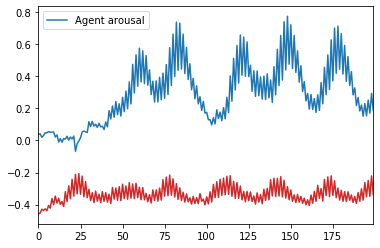

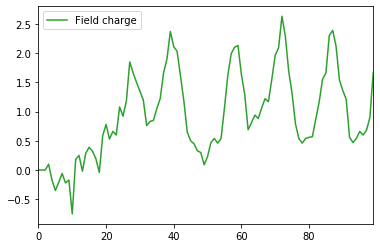

In [3]:
import model as cyberemotions
cyberemotions.analyze_data(cyberemotions.start_simulation(100, # How many time steps does the model run for?
                                                          100, # How many agents are simulated?
                                                          True, # Can the agent(s) express their emotions?
                                                          True, # Do stochastic factors influence the agent(s)?
                                                          None, # Provide artificial stimuli by changing the field:
                                                          None)) # Timestep of occurence, positive expressions, negative expressions

However, these patterns of collective emotions only emerge when the number of agents in the simulation pass a certain tipping point, which lies around 90 agents, and also dissapear again in favor of one collective that never fades out again. The following two sets of figures illustrate this.

Here the simulation is run with 30 agents instead of 100. There are no patterns of collective emotions visible, because the number of the agent expressions is too small to have a meaningful impact on the field, which in turn does not affect the agents emotions significantly.

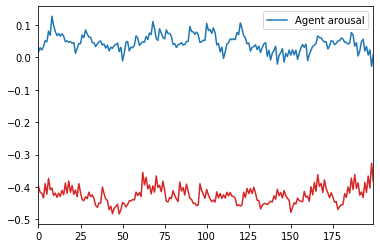

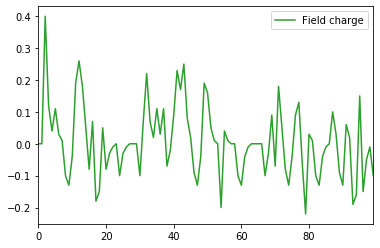

In [5]:
import model as cyberemotions
cyberemotions.analyze_data(cyberemotions.start_simulation(100, # How many time steps does the model run for?
                                                          50, # How many agents are simulated?
                                                          True, # Can the agent(s) express their emotions?
                                                          True, # Do stochastic factors influence the agent(s)?
                                                          None, # Provide artificial stimuli by changing the field:
                                                          None)) # Timestep of occurence, positive expressions, negative expressions

Likewise, when the number of agents is increased beyond around 200, the general pattern of collective emotions appears again, but these emotions never fully fade out and the again remain in a very agitated state of valence that is significantly above their baseline.

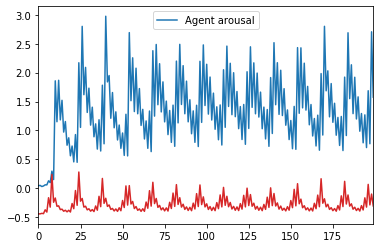

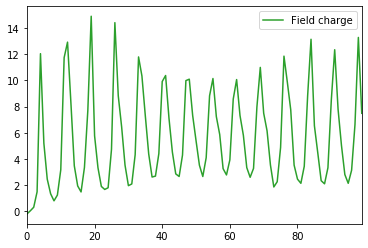

In [14]:
cyberemotions.analyze_data(cyberemotions.start_simulation(100, # How many time steps does the model run for?
                                                          250, # How many agents are simulated?
                                                          True, # Can the agent(s) express their emotions?
                                                          True, # Do stochastic factors influence the agent(s)?
                                                          None, # Provide artificial stimuli by changing the field:
                                                          None)) # Timestep of occurence, positive expressions, negative expressions

### Drawn conclusions

In the standard model that does not include a satiation feature and relies only on the immediate down-regulation of emotions after an expression, there seems to be the following problem when running it with 100 agents:
 - The impact of the sum of all agent expressions on the individual agents causes their arousal to immediately spike up again after its down-regulation and relaxation, causing yet another expression, and so on and so forth.
 - Agent state variables do not have the time to significantly decrease towards their baseline values before being increased again.

The following potential adjustments could be able to solve this:
 1. Changing the impact variable that determines the impact of an agent expression on the field and scaling it to the number of agents in the simulation, i.e. the more agents there are, the less impact one individual expression has. Alternatively, it may be even better to adjust the impact variable at each given time step, according not to the total number of agents, but to the number of agents expressing their emotions at each time step.
 2. Introducing additional mechanisms that affect agent arousal. While adding a "satiation period" illustrates how patterns of collective emotions can be achieved, it does not appear to be an attractive solution, because it is not based on empirical observations and furthermore only improves the model when running it with certain settings.